# Risk Management of Goldman Sachs Stock Performance

## Overview

Goldman Sachs is well recognized for their sophistication of quantitative risk management in delivering customized returns and exponential growth for high-profile clients and institutions (Mcclay, 2023). This analysis is to capture the health of that specific competency of the institution itself to project feasible decision outputs for portfolio managers and risk analysts. The data is extracted from a public source for analysis where analysts and data scientists, like Kapturov distributes and arranges the resources and enable access for further constructive and business studies.

A thorough picture of the performance of Goldman Sachs (GS) equities is provided by the analysis, which emphasizes the significance of sound risk management techniques. The study explores a number of risk categories, including credit risk and tail risk, as well as important risk indicators including Value at Risk (VaR), Expected Shortfall, delta, rho, and many more metric assessment in depth. The main goal is to demonstrate how these risk categories and measures may be easily included into trading and hedging plans to increase profits while reducing possible losses.

The analysis highlights the need of thorough risk assessment in attaining long-term profitability and financial stability and promotes a proactive and knowledgeable approach to investment decisions. Investors can more effectively navigate market turbulence and uncertainty by comprehending the subtle behavior of GS stock and putting advanced risk management strategies into practice. In addition to optimizing returns, this holistic approach makes ensuring that portfolios are adequately safeguarded against a variety of possible hazards. In the end, the research acts as a manual for embracing a risk-aware and strategic approach while trading and investing in Goldman Sachs stocks. 


## Aggregating Data ##

In [2]:
!pip install pandas

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [57]:
# Load the stock price data from a CSV file named 'GS.csv'
stock_data = pd.read_csv('GS.csv')

# Convert the 'Date' column to datetime format for proper sorting
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort the dataset by date in descending order to have the most recent date on top
stock_data_sorted = stock_data.sort_values(by='Date', ascending=False)

# Display the most recent 10 rows of the sorted dataset to verify its structure and contents
# The dataset should include columns for Open, High, Low, and Close prices
print(stock_data_sorted.head(10))

          Date        Open        High         Low       Close   Adj Close  \
333 2024-05-01  426.690002  433.429993  425.190002  426.950012  426.950012   
332 2024-04-30  428.500000  431.390015  426.000000  426.709991  426.709991   
331 2024-04-29  427.570007  433.329987  427.200012  430.809998  430.809998   
330 2024-04-26  420.230011  428.529999  419.640015  427.570007  427.570007   
329 2024-04-25  420.989990  423.609985  414.850006  420.049988  420.049988   
328 2024-04-24  421.500000  424.579987  419.609985  423.040009  423.040009   
327 2024-04-23  417.709991  425.350006  416.200012  424.000000  424.000000   
326 2024-04-22  406.940002  417.980011  404.570007  417.350006  417.350006   
325 2024-04-19  404.059998  408.000000  403.010010  404.000000  404.000000   
324 2024-04-18  405.489990  407.859985  402.410004  403.109985  403.109985   

      Volume  
333  2310100  
332  1829900  
331  2453000  
330  2322700  
329  1970100  
328  1575900  
327  2662300  
326  4165600  
325  2

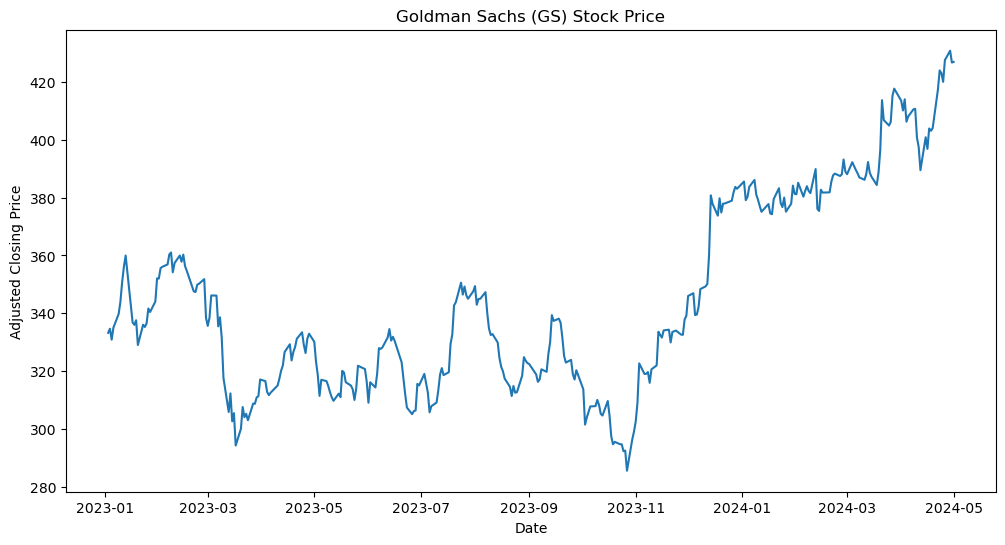

In [41]:
# Load the data from GS.csv
df = pd.read_csv('GS.csv', parse_dates=['Date'], index_col='Date')

# Visualize the stock price
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'])
plt.title('Goldman Sachs (GS) Stock Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

From January 2023 to May 2024, Goldman Sachs (GS) stock experienced considerable fluctuations and recovery. Initially, the stock's adjusted closing price showed a downward trend, decreasing from approximately USD 360 in January 2023 to below USD 300 by March 2023. This period of decline might have been influenced by various market conditions, economic factors, or company-specific news.

Following this dip, the stock price exhibited a phase of volatility, fluctuating between USD 300 and USD 340 until July 2023. During this time, the market seemed to be uncertain about the stock’s future direction. However, starting in late July 2023, the stock began a more consistent upward trend. This recovery phase saw the price steadily climb, reaching above USD 420 by May 2024.

This overall trend suggests that after an initial period of instability and volatility, Goldman Sachs' stock managed to recover and enter a growth phase. Investors watching the stock during this period would have seen a significant rebound, indicating a potential positive outlook for the company's financial health and market performance. This pattern of decline followed by recovery is not uncommon in the stock market and highlights the importance of long-term investment strategies and careful market analysis.sis.

## Stock Returns

In [47]:
import pandas as pd

# Load the stock price data from a CSV file named 'GS.csv'
stock_data = pd.read_csv('GS.csv')

# Convert the 'Date' column to datetime format for proper filtering
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort the dataset by date in ascending order
stock_data.sort_values(by='Date', ascending=True, inplace=True)

# Filter for the last 10 days of data
last_ten_days_data = stock_data.tail(10).copy()  # Get the last 10 rows

# Calculate daily returns as percentage change for the filtered data using .loc
if 'Close' in last_ten_days_data.columns:
    last_ten_days_data.loc[:, 'Daily_Returns'] = last_ten_days_data['Close'].pct_change() * 100  # Convert to percentage

# Display the last ten days data with returns
print(last_ten_days_data[['Date', 'Close', 'Daily_Returns']])


          Date       Close  Daily_Returns
324 2024-04-18  403.109985            NaN
325 2024-04-19  404.000000       0.220787
326 2024-04-22  417.350006       3.304457
327 2024-04-23  424.000000       1.593385
328 2024-04-24  423.040009      -0.226413
329 2024-04-25  420.049988      -0.706794
330 2024-04-26  427.570007       1.790268
331 2024-04-29  430.809998       0.757769
332 2024-04-30  426.709991      -0.951697
333 2024-05-01  426.950012       0.056249


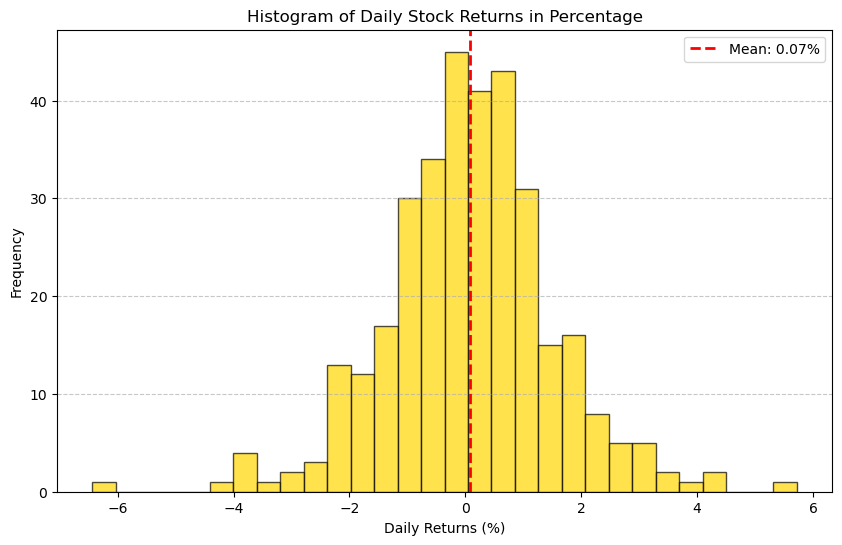

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock price data from a CSV file named 'GS.csv'
stock_data = pd.read_csv('GS.csv')

# Calculate daily returns as percentage change
if 'Close' in stock_data.columns:
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change() * 100  # Convert to percentage

# Drop NaN values in 'Daily_Returns'
stock_data.dropna(subset=['Daily_Returns'], inplace=True)

# Calculate the mean of daily returns
mean_return = stock_data['Daily_Returns'].mean()

# Plotting the histogram of returns in percentage
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Daily_Returns'], bins=30, color='gold', edgecolor='black', alpha=0.7)

# Add the mean line
plt.axvline(mean_return, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_return:.2f}%')

# Customize the plot
plt.title("Histogram of Daily Stock Returns in Percentage")
plt.xlabel("Daily Returns (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The daily percentage returns on Goldman Sachs' shares are displayed in the histogram. The returns fall between about -6% and 6%, with most of them grouped around the red dashed vertical line, which represents the mean daily return of 0.07%. The distribution looks regular, with a center of 0%, suggesting that the daily returns of the stock usually fall within this range. The range of -2% to 2% has the highest frequency of returns, indicating that both positive and negative extreme daily returns are comparatively uncommon.

This pattern highlights a certain measure of stability by showing that although Goldman Sachs' stock fluctuates everyday, severe moves are less frequent. This information can be used by analysts and investors to evaluate the stock's predicted performance and level of risk. Making wise investment decisions requires an understanding of the daily return's core tendency and variability. All things considered, the histogram offers a succinct and straightforward representation of the daily return distribution, highlighting the equilibrium between risk and return for Goldman Sachs shares.


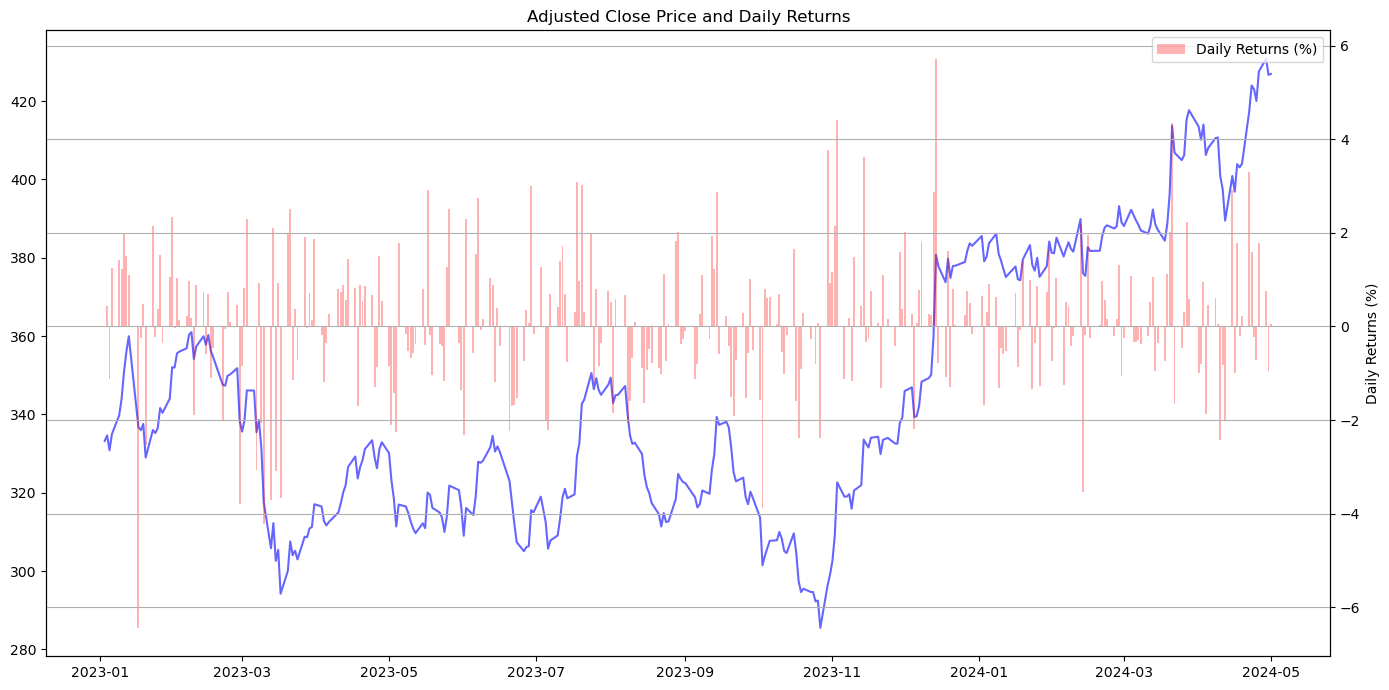

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock price data from a CSV file named 'GS.csv'
stock_data = pd.read_csv('GS.csv')

# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort the dataset by date in ascending order
stock_data.sort_values(by='Date', ascending=True, inplace=True)

# Calculate daily returns as percentage change
if 'Adj Close' in stock_data.columns:
    stock_data['Daily_Returns'] = stock_data['Adj Close'].pct_change() * 100  # Convert to percentage

# Plotting
plt.figure(figsize=(14, 7))

# Plot Adjusted Close price
plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adjusted Close Price', color='blue', alpha=0.6)

# Create a second y-axis for daily returns
ax2 = plt.gca().twinx()
ax2.bar(stock_data['Date'], stock_data['Daily_Returns'], label='Daily Returns (%)', color='red', alpha=0.3)

# Customize the plot
plt.title('Adjusted Close Price and Daily Returns')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
ax2.set_ylabel('Daily Returns (%)')
plt.xticks(rotation=45)
plt.grid(True)

# Adding legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


The graph offers a thorough analysis of the performance of Goldman Sachs' (GS) shares between January 2023 and May 2024. It provides information about the stock's trend and volatility within this time frame by combining the adjusted close price and daily returns.

The adjusted closure price is represented by the blue line, which initially declines from about USD 360 in early 2023 to less than USD 300 by mid-2023. This downward trend suggests potential early instability brought on by outside market forces. After that, the stock goes through a period of volatility, ranging from USD 300 to USD 340 until July 2023. Following this time frame, the blue line rises gradually, signifying a phase of recovery that concludes in a price above USD 420 by May 2024.\

The red vertical bars, which range from -6% to 6%, show the daily returns as a percentage. These bars give an idea of the stock's volatility and show the daily variations. Although the chart shows notable peaks and troughs that correspond with times of fast price movements indicated by the blue line, the majority of returns cluster around 0%.

This chart provides a comprehensive picture of Goldman Sachs' stock by combining adjusted close price and daily returns, emphasizing both the recovery's general trend and the daily volatility that goes along with it. For investors evaluating the performance and risk of the stock, this integrated analysis is essential.
.



## Stationarity

### 1. Augmented Dickey-Fuller Test

In [168]:
# Check for stationarity using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(returns)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -7.957025485818249
p-value: 3.0181125736835225e-12
Critical Values: {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}


---------

In order to configure the share price exposure to return risk, ADF (Augmented Dickey-Fuller) statistics is applied to assess if the statistical properties of returns exhibit consistency over periods of time. If the returns appear to be stable, then the stock price is strongly responsive to the past returns, which is predictable for future returns. For this to be true, the ADF statistic has to be below the cut-offs of the critical values (Guo, Z., 2023)

Our test result passes all the significance thresholds with an outstanding figure of 17. Further, the p-value is incredibly optimum for our alpha limit of 5% in implementation of 95% of confidence interval, from which it opposes the null hypothesis of non-stationarity. They entail the returns to be stationary in time series, which means it can operate further model, such as GARCH,s to forecast changes feasibly in terms of volatiity





### 2. Autocorrelation and Partial Autocorrelation

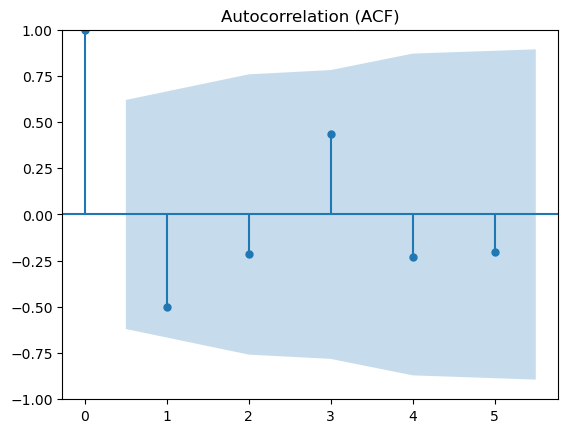

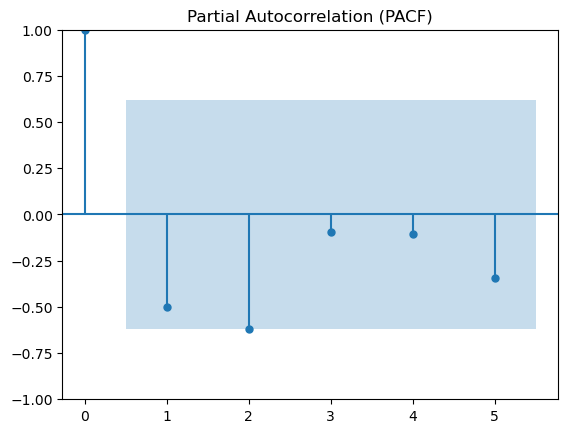

In [170]:
# Explore autocorrelation with 95% confidence intervals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF with 95% confidence interval
plot_acf(returns, alpha=0.05)
plt.title('Autocorrelation (ACF)')
plt.show()

# Plot PACF with 95% confidence interval
plot_pacf(returns, alpha=0.05)
plt.title('Partial Autocorrelation (PACF)')
plt.show()

The lags appear to be minimal and quickly disappear after a few spikes; this emphasizes the time series of the returns is stationary and relevant for short-term risk exploitation. The plot measures are set to define significance of relationships within the confidence interval of 95% in which the confidence bands appear as blue shades for restriction of insignificance.

Indicated by ACF, the confidence interval spreads as time passes; meaning it is harder for the individual lags to significantly express accumulating effects from the beginning lag. However, the shade of insignificance becomes stationary, performed by PACF, leaving the third lag to be crucially engaged in a direct influence of the first lag. The depiction suggests that today’s returns are going to expect an opposite effect on the returns in two days.

## Volatility Measure

### 1. Risk vs Reward

Annualized Volatility: 0.2314
95% VaR: -0.0231
Expected Shortfall: -0.0339


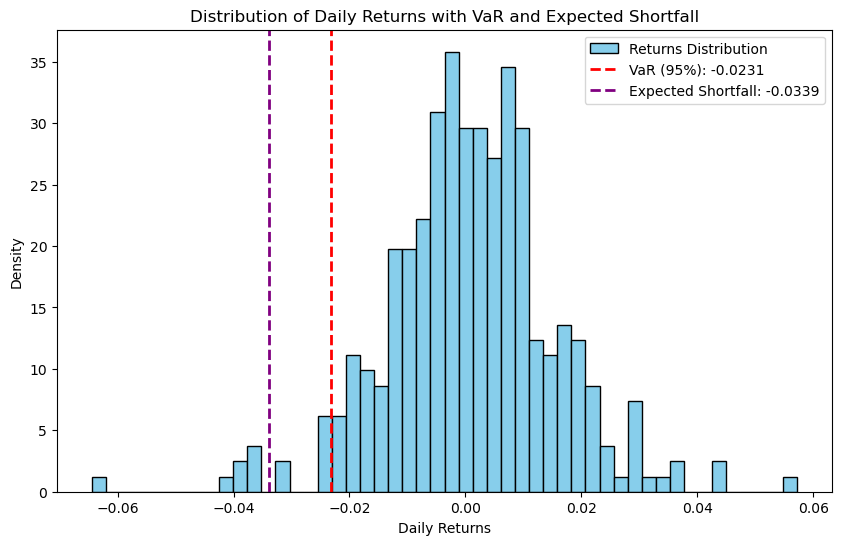

In [79]:
# Assuming your stock data is in a pandas DataFrame named 'df'

# Calculate daily returns
returns = df['Adj Close'].pct_change().dropna()

# Calculate annualized volatility (assuming 252 trading days per year)
annualized_volatility = returns.std() * np.sqrt(252)
print(f'Annualized Volatility: {annualized_volatility:.4f}')

# Calculate VaR at a 95% confidence level
var_95 = stats.norm.ppf(0.05, loc=returns.mean(), scale=returns.std())
print(f'95% VaR: {var_95:.4f}')

# Calculate expected shortfall at a 95% confidence level
expected_shortfall = returns[returns <= var_95].mean()
print(f'Expected Shortfall: {expected_shortfall:.4f}')

# Plot histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, color='skyblue', edgecolor='black', density=True, label='Returns Distribution')

# Add lines for VaR and Expected Shortfall
plt.axvline(var_95, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {var_95:.4f}')
plt.axvline(expected_shortfall, color='purple', linestyle='--', linewidth=2, label=f'Expected Shortfall: {expected_shortfall:.4f}')

# Add titles and labels
plt.title('Distribution of Daily Returns with VaR and Expected Shortfall')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [149]:
stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Assume a risk-free rate (e.g., 2% annualized)
risk_free_rate = 0.02 / 252  # Annual rate converted to daily rate

# Sharpe Ratio calculation
excess_returns = stock_data['Daily_Returns'] - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')


Sharpe Ratio: 0.044161465029360435


------

Since most returns are reliable for short-term approaches, which means there can be potential uncertainty of returns in the long-term, namely in a given year of 252 periods of trading days. The affect can be assessed with the Annualized Volatility at 0.231, giving an idea that the share price will confront  possible fluctuations of 23% over the course of 12 months given its historical data.

Furthermore, the PACF obtained a direct correlation between the first and third lag as in opposite accord; by the second day after the return of the first day, we are expecting a loss. What is the degree of the downside of our portfolio to which we can expect in a single day? This is well-assessed by the Value at Risk function regarding the 95% of confidence level, which shows a negative of 0.023. On a daily basis, the investment will apprehend a depletion of less than 2.3% in its returns at 95% of the time. Nonetheless, what severe is the other 5% of the time, the portfolio is possible to encounter a larger reduction than the threshold of its returns in any given day.

Hence, if that is the case, what is the statistical observation for that particular scenario is to associate the Expected Shortfall figure. The function underlines the potential cutback of the return value on average if risk volatility is compromised, and that the returns are predicted to devalue by 3.4% on average if rare market conditions are bound to arise in unexpected times.

Regardless, in terms of volatility or risks, there are opportunities the investment can possibly progress from exercising the risk aspects; this is where the Sharpe Ratio comes into play. The ratio compares the performance of an investment to an asset that carries no risk. To be more precise, it shows the investor's excess return when each unit of volatility or risk is attributed (Lioudis, N., 2024). For the instance of 2% annualized risk-free rate, the investor can comprehend a 4.4% of excess returns on average per unit of risk, which is only a small fraction of success rate compared to the sharp ratio scale of Kelliher, C. (2022).

### 2. GARCH Model

For time-varying volatility, the GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model is inclusive to project the clustering of high conditional volatility over periods of high and low occurring after one another to manage portfolio risk in those specific times, because the model incorporates one lag of both the return residuals (ARCH term) and the past conditional volatility (GARCH term) to essentially analyze today’s volatility based on yesterday’s with past returns raised to the power of two for larger fluctuations emphasis (Afzal, Haiying, Afzal, Mahmood, & Ikram, 2021).

In [73]:
pip install arch

   ---------------------------------------- 0.0/923.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/923.9 kB ? eta -:--:--
   - ------------------------------------- 30.7/923.9 kB 660.6 kB/s eta 0:00:02
   ------- -------------------------------- 174.1/923.9 kB 1.8 MB/s eta 0:00:01
   ----------------------- ---------------- 553.0/923.9 kB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 890.9/923.9 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 923.9/923.9 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
from arch import arch_model

# Model volatility using a GARCH(1,1) model
returns = stock_data['Daily_Returns'].dropna()
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

print(garch_result.summary())

# Forecast future volatility
forecast = garch_result.forecast(horizon=5)
print(forecast.variance[-1:])

                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -594.349
Distribution:                  Normal   AIC:                           1196.70
Method:            Maximum Likelihood   BIC:                           1211.93
                                        No. Observations:                  333
Date:                Tue, Oct 08 2024   Df Residuals:                      332
Time:                        23:17:01   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0407  8.873e-02      0.458      0.647 [ -0.133,  0.21

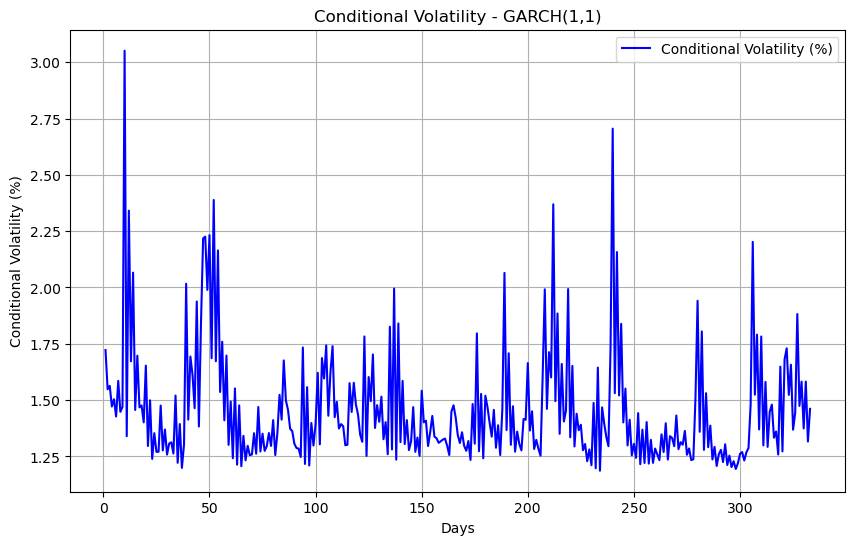

In [68]:
import matplotlib.pyplot as plt

# Plot the conditional volatility (standard deviation)
plt.figure(figsize=(10, 6))
plt.plot(garch_result.conditional_volatility * 100, label='Conditional Volatility (%)', color='blue')  # Convert to percentage
plt.title('Conditional Volatility - GARCH(1,1)')
plt.xlabel('Days')  # Label for x-axis
plt.ylabel('Conditional Volatility (%)')  # Label for y-axis
plt.legend()
plt.grid()
plt.show()


Because the prediction only involves within the range of 15 months of stock price movements, a t-statistic is calculated to account for the distribution. As a result, the mean return of the portfolio is 4% represented by the mu; however, by considering the p-value larger than 5%, it signifies the average return to be affected by other random variables rather than consistent throughout the time series.

Conferring to the volatility criteria, the omega coefficient is intense at 88% in identifying strong price fluctuations overtimes, causing the returns to deviate in great magnitude from the mean return not entirely from past returns or uncertainty. Fortunately, this immense feature is not influencing the model due to its significance value. 
Moreover, though the alpha value is moderate in taming the current returns from prior considerable ones, it is still not entirely exceptional for the financial instrument to experience one, encapsulated by its significance. Meanwhile, the beta coefficient is conservative in showing the persistence of volatility that it is not likely to dominate throughout the time series; one can only assure this effect with other considerable variables in play with its p-value of 0.2.


Affirmatively, from a risk vs reward analysis perspective, the GARCH model plot clearly announces its behavior in the course of a year. It suggests that volatility is more unpredictable and transient, even recent shocks are not the primary cause of the present volatility; thus, future occurrences of high or low volatility do not appear to follow any discernible pattern of sudden price move .
We can see that one of the highest volatility percentages in this model is slightly over than 3% in very sudden periods, meaning the price can be shaken up in both directions by that percentage and that the returns is also expected to encounter either unusual gains or losses in those high peaks. This is also falls into the Expected Shortfall at 3.4% by which the share price can possibly lose 3.4% on average in volatile momens.


### 3. TGARCH

In [70]:
# Load the stock price data from a CSV file named 'GS.csv'
stock_data = pd.read_csv('GS.csv')

# Check if the 'Close' column exists in the DataFrame
if 'Close' not in stock_data.columns:
    raise ValueError

# Calculate daily returns (percentage change) if not already present
if 'Daily_Returns' not in stock_data.columns:
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Drop any NaN values in the returns data
returns = stock_data['Daily_Returns'].dropna()

# Rescale the returns data to improve model fitting
returns_rescaled = returns * 100  # Rescaling by 100 as suggested

# Model volatility using a TGARCH(1,1) model
# Use 'Garch' for the TGARCH model, set o=1 to indicate threshold effects
tgarch_model = arch_model(returns_rescaled, vol='Garch', p=1, q=1, o=1)  # o=1 indicates threshold effects

# Fit the model and suppress output
tgarch_result = tgarch_model.fit(disp='off')

# Print the TGARCH model summary
print(tgarch_result.summary())

# Forecast future volatility for the next 5 periods
forecast = tgarch_result.forecast(horizon=5)

# Print the forecasted variance for the next period
print("Forecasted variance for the next period:")
print(forecast.variance.values[-1, :])  # Display forecast for the last period

# Alternatively, print the full forecasted variance for the horizon
print("\nFull forecasted variance for the horizon:")
print(forecast.variance.values)


                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:          Daily_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -593.996
Distribution:                  Normal   AIC:                           1197.99
Method:            Maximum Likelihood   BIC:                           1217.03
                                        No. Observations:                  333
Date:                Sun, Jan 05 2025   Df Residuals:                      332
Time:                        01:12:07   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0467  8.366e-02      0.558      0.577 [ -0.117,  0.21

------

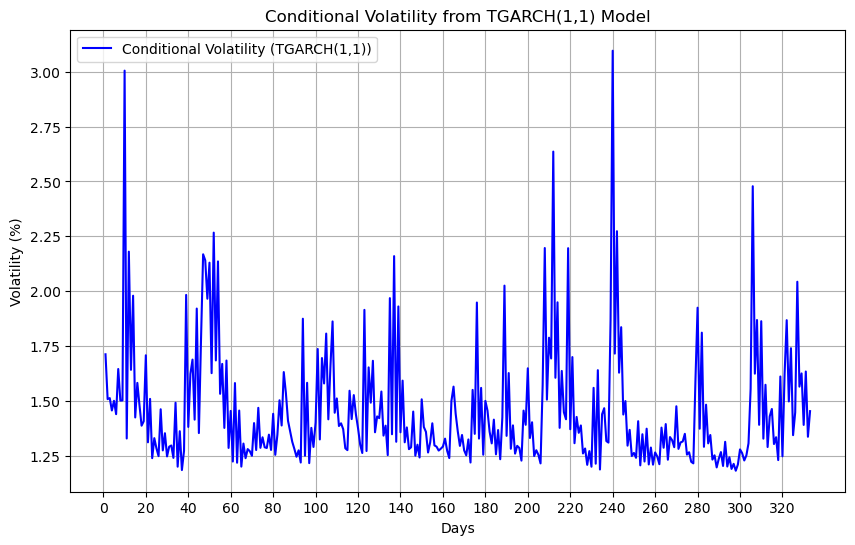

In [86]:
# Plot the conditional volatility as a percentage
plt.figure(figsize=(10, 6))
plt.plot(tgarch_result.conditional_volatility * 100, label='Conditional Volatility (TGARCH(1,1))', color='blue')  # Convert to percentage
plt.title('Conditional Volatility from TGARCH(1,1) Model')
plt.xlabel('Days')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid()

# Optional: Set x-ticks if needed
plt.xticks(ticks=np.arange(0, len(tgarch_result.conditional_volatility), step=20))  # Adjust step for readability

plt.show()

In this setting, the average return is incredibly small that its importance is not of consideration to the overall volatility of the asset. Nevertheless, the omega effect is intensively significant, given its p-value, the returns do deviate from the mean returns even when volatility clustering is absent but only to a noticeable modest extent; indicating a reliable model component for influencing volatility.

On the other hand, past shocks, presented by the alpha, is not statistically significant to decide if the current share price can confidently enable anticipated fluctuations; though, the coefficient is moderate. In addition, in the case of asymmetry in the variability, the gamma consists of a negative figure (-0.098); imposing negative large returns of former periods allow more powerful responses on unpredictability than positive shocks. But counting on the 95% confidence interval, the time series appear not to be greatly volatile because of negative returns. We cannot also forget about the past volatility impact on the present uncertain scenarios measured by the beta at 42% with the p-value significantly deviates from the cut-off of 5%. This elaborates that today’s gains and losses are hugely unpredictably manifested from historical turbulence associated with the share price.

In visualization, the variation is rigorous and swift in every course of 20 days, from which the uncertainty is largely but moderately impacted by the past volatility, while the average variance is also part of the cause but barely notice in the time series. Especially, between day 220 and 240, the rate is incomparable, from which the previous fluctuations amount to this momentum since from the first 20 days, which are very similar. In certainty of past volatility influence, between day 85 and 200, the swings are still vicious but quite predictable to prepare and target for the sharp ratio at 4.5% when the volatility is so far at 2.24%.

### 4. Rolling Volatility

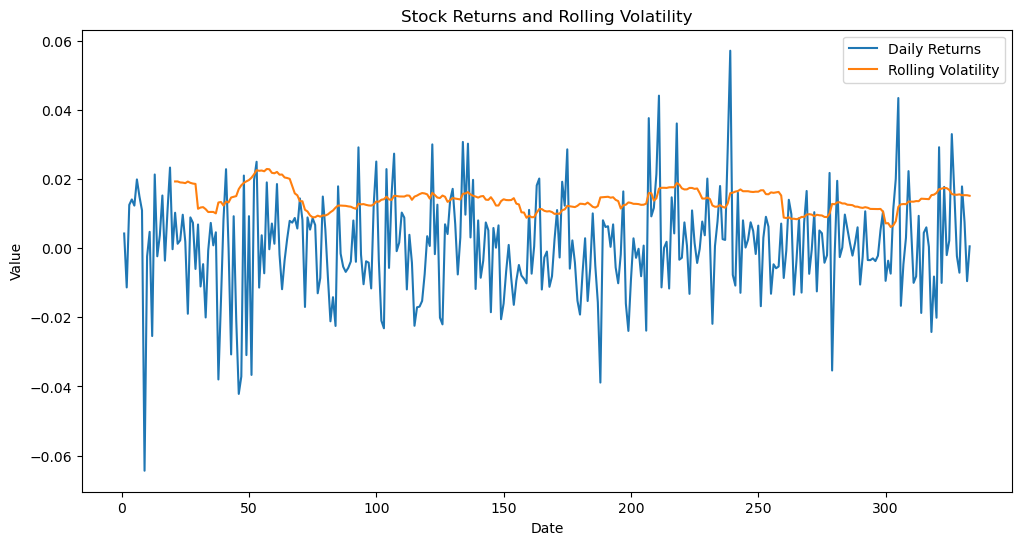

In [35]:
# Load the stock price data from a CSV file named 'GS.csv'
stock_data = pd.read_csv('GS.csv')

# Ensure 'Daily_Returns' exists; if not, calculate it
if 'Daily_Returns' not in stock_data.columns:
    # Calculate daily returns as percentage change
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change().dropna()

# Drop any NaN values that may have resulted from the pct_change()
returns = stock_data['Daily_Returns'].dropna()

# Set the rolling window size (adjust as needed)
window_size = 21  # 21 days (approximately a month)

# Calculate rolling standard deviation as a measure of volatility
rolling_volatility = returns.rolling(window=window_size).std()

# Plot the historical returns and rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(returns, label='Daily Returns')
plt.plot(rolling_volatility, label='Rolling Volatility')
plt.title('Stock Returns and Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Now, let us see what it looks like when the returns and risk exposures are sequenced on a single rolling base. Little volatility contributes to noticeable changes and uncertainty of returns, providing a clear indication of correlation between the two. More absolute returns of either side are likely to be accompanied by greater volatile times.

On broad overview, the two variables tend to capture an opposite relationship if we inspect the highs and lows carefully; in times where there are strong positive variance like around day 50, the portfolio is anticipated to see more decline in returns down to over 6%. This might be relativistic to the magnitude regarding the range of time and effects as we observed through ACF and PACF. As time progresses the volatility appears to be less dynamic but they cluster and persist over times, which is difficult to decide the direct relationship toward the return.


That does not mean there are not any opportunities to be exploited during risk exposures, such as between day 200 and 250, the portfolio managers can gain from 3 up to 6 percent of returns per risk unit exercised when the variation is building momentum; this projection is consistent with the Sharp Ratio of 4.49 Regardless, how responsive between volatility and return; we can conduct a simple scatter plot to affirm if they feature an appropriate correlation.%.


## Relationship

Correlation between Returns and Rolling Volatility:  0.05318433685166314

Summary Statistics of Returns:
count    313.000000
mean       0.059572
std        1.424623
min       -4.215260
25%       -0.808872
50%        0.056249
75%        0.810143
max        5.717749
Name: Daily_Returns, dtype: float64

Summary Statistics of Volatility:
count    313.000000
mean     139.667438
std       32.356220
min       61.501495
25%      119.206571
50%      137.871464
75%      158.814592
max      229.515257
Name: Daily_Returns, dtype: float64


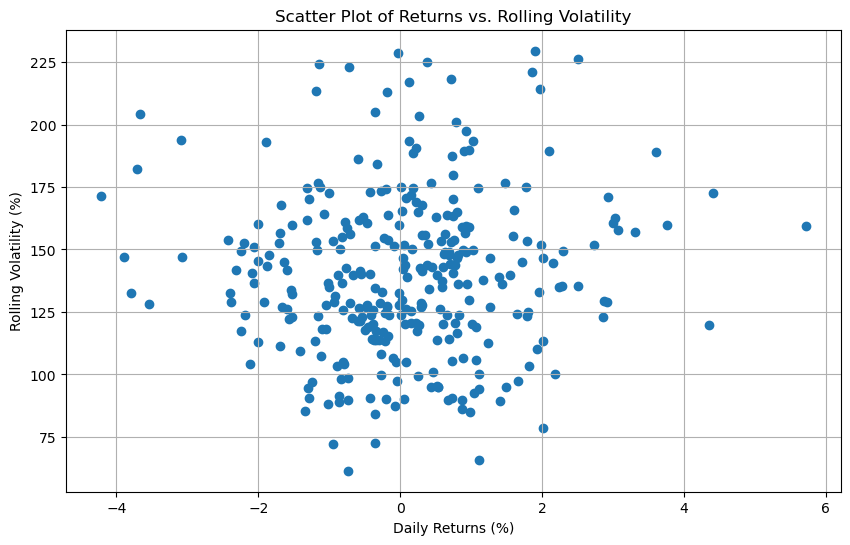

In [10]:
# Load the stock price data from a CSV file named 'GS.csv'
stock_data = pd.read_csv('GS.csv')

# Ensure 'Daily_Returns' exists; if not, calculate it
if 'Daily_Returns' not in stock_data.columns:
    # Calculate daily returns as percentage change
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change().dropna()

# Drop any NaN values that may have resulted from the pct_change()
returns = stock_data['Daily_Returns'].dropna() * 100  # Convert to percentage

# Set the rolling window size (adjust as needed)
window_size = 21  # 21 days (approximately a month)

# Calculate rolling standard deviation as a measure of volatility
rolling_volatility = returns.rolling(window=window_size).std() * 100  # Convert to percentage

# Drop any NaN values from rolling volatility (because the first `window_size` values will be NaN)
rolling_volatility = rolling_volatility.dropna()

# Align the data by dropping NaN values from returns corresponding to rolling_volatility
aligned_returns = returns[-len(rolling_volatility):]

# Calculate correlation
correlation = np.corrcoef(aligned_returns, rolling_volatility)[0, 1]

# Summary statistics of returns and volatility
returns_stats = aligned_returns.describe()
volatility_stats = rolling_volatility.describe()

# Output results
print("Correlation between Returns and Rolling Volatility: ", correlation)
print("\nSummary Statistics of Returns:")
print(returns_stats)
print("\nSummary Statistics of Volatility:")
print(volatility_stats)

# Plot the relationship between returns and rolling volatility
plt.figure(figsize=(10, 6))
plt.scatter(aligned_returns, rolling_volatility)
plt.title('Scatter Plot of Returns vs. Rolling Volatility')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Rolling Volatility (%)')
plt.grid(True)
plt.show()


Scatter plot is a straightforward tool between two variables to examine if there are significant relations before proceeding to sophisticated regression analysis. Both of the constructs are very differing in terms of relationship as we can see that the data points are widely embedded to hardly see any concentration of linear correlation. This suggests both of the variables to be independent to give rises to one another’s outcomes, as shown by the correlation figure of 0.053.

With an average daily return of 0.0596%, there appears to have been some increases over that time. Nonetheless, this mean falls inside the range with a high degree of variability, as indicated by the standard deviation (1.4246). Stock returns often have a high standard deviation compared to the mean, which is a sign of the frequent fluctuations.Observing from its quartiles, the median, represented by the 50th percentile, is 0.056% along with its interquartile range between -0.808% at the 25th percentile and 0.81% at the 75th percentile, making the distribution to closely resemble a symmetrical form with most frequent daily returns reside in the -/+1% interval. Judging by the minimum of -4.21% and maximum of 5.71%, the returns are relatively clustered in which some days may be presented with outliers substantially perhaps due to rare market events.

The volatility mean of 139 indicates a substantial instability which imposes the variability of returns to a certain extent of consistency, as seen in the previous rolling volatility chart, in response to daily return percentages. No to mention its wideness of interquartile from 119 of the lower one to 158 of the higher one. These values reflect serious variance in the underlying trading periods, which can also be explained by the huge gap between the maximum at 61 and the maximum of 229 in signaling the returns to be carefully studied in various volatility segments to account for any high uncertainty in a given trading day.

## Probability of Returns

### 1. Discrete Poisson

The Poisson distribution investigates stock price fluctuations by offering a more granular understanding of the underlying dynamics, allowing for the prediction of the likelihood of distinct changes in stock values over specific increments of time, especially during short periods, thus providing valuable insights into the frequency and magnitude of price movements that are relatively rare yet significant in the context of daily trading activity (Jayasekare, Gill, & Lee, 2016).

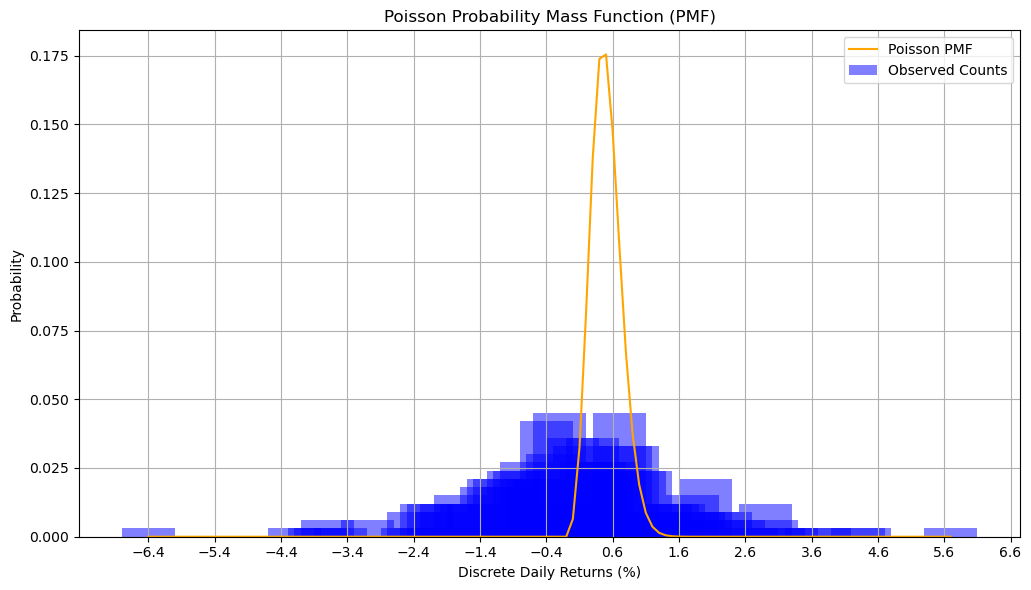


Summary Statistics for Daily Returns:
count    333.000000
mean       0.000736
std        0.014608
min       -0.064385
25%       -0.007719
50%        0.000670
75%        0.008767
max        0.057177
Name: Daily_Returns, dtype: float64

Fitted Poisson Distribution Parameter (lambda):
Lambda: 5.0455


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort the dataset by date in ascending order
stock_data.sort_values(by='Date', ascending=True, inplace=True)

# Calculate daily returns as percentage change
if 'Close' in stock_data.columns:
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Drop NaN values in 'Daily_Returns'
stock_data.dropna(subset=['Daily_Returns'], inplace=True)

# Discretize daily returns by rounding to the nearest integer (scaled to percentage)
discrete_returns = (stock_data['Daily_Returns'] * 1000).round().astype(int)  # Scale and round

# Calculate the frequency of each unique return
return_counts = discrete_returns.value_counts().sort_index()

# Fit a Poisson distribution to the data
lambda_param = return_counts.mean()  # Mean of the counts to use as lambda for Poisson

# Create a range of values for plotting the PMF and CDF
x = np.arange(return_counts.index.min(), return_counts.index.max() + 1)

# Calculate PMF and CDF using the fitted lambda
pmf = stats.poisson.pmf(x, lambda_param)
cdf = stats.poisson.cdf(x, lambda_param)

# Plotting the PMF and CDF
plt.figure(figsize=(20, 6))

# PMF Plot
plt.subplot(1, 2, 1)
plt.bar(return_counts.index * 0.1, return_counts.values / return_counts.sum(), alpha=0.5, label='Observed Counts', color='blue', width=0.8)
plt.plot(x * 0.1, pmf, label='Poisson PMF', color='orange')
plt.title('Poisson Probability Mass Function (PMF)')
plt.xlabel('Discrete Daily Returns (%)')
plt.ylabel('Probability')

# Set x-ticks to display at intervals of 1% for better readability
plt.xticks(np.arange(return_counts.index.min() * 0.1, return_counts.index.max() * 0.1 + 1, 1))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Summary stat
# Summary statistics
summary_statistics = stock_data['Daily_Returns'].describe()
print("\nSummary Statistics for Daily Returns:")
print(summary_statistics)

# Display fitted lambda parameter for the Poisson distribution
print("\nFitted Poisson Distribution Parameter (lambda):")
print(f"Lambda: {lambda_param:.4f}")

Because the variables are independent and they do not seem to have clear pattern of relationship over times, it is beneficial the return events in a random analysis based on Poisson discrete probability. In this case, the Poisson Probability Mass Function presents the likelihood by using the mean rate to precisely calculate a particular value of returns within certain parameters of discrete frequency bands at a fixed interval.

Based on the distribution, there are rare cases where the returns can lose over 6% and win over 5%, as illustrated by the rolling volatility diagram. It is, however, concentrated around the mean, smaller than 1 and close to 0, with the curvature oscillate between -0.4 to 1.6 percent of discrete daily return. Within that curve the probability of the return gaining and losing can reach as high as 17% at a given trading day with 0.6% of return obtaining the likelihood of approximately 13%. As the return approaches to 0 the greater the chances, resembling a look alike of a symmetric shape.

The probabilities of those return events have a constant at 5.04, meaning the average rate of those returns, specifically from -0.2 to 1.6 percent, occurring per day is 5.04 times. As the diagram portrays a very high and almost like symmetric probability curve clustered around the mean, the lambda is considered as a low frequency for the returns to set on larger rewards from the mean. Thus, in Poisson discrete measurement, the probability of returns are predictable in a day and can attain up to 17% with the return rate of 0.3%.


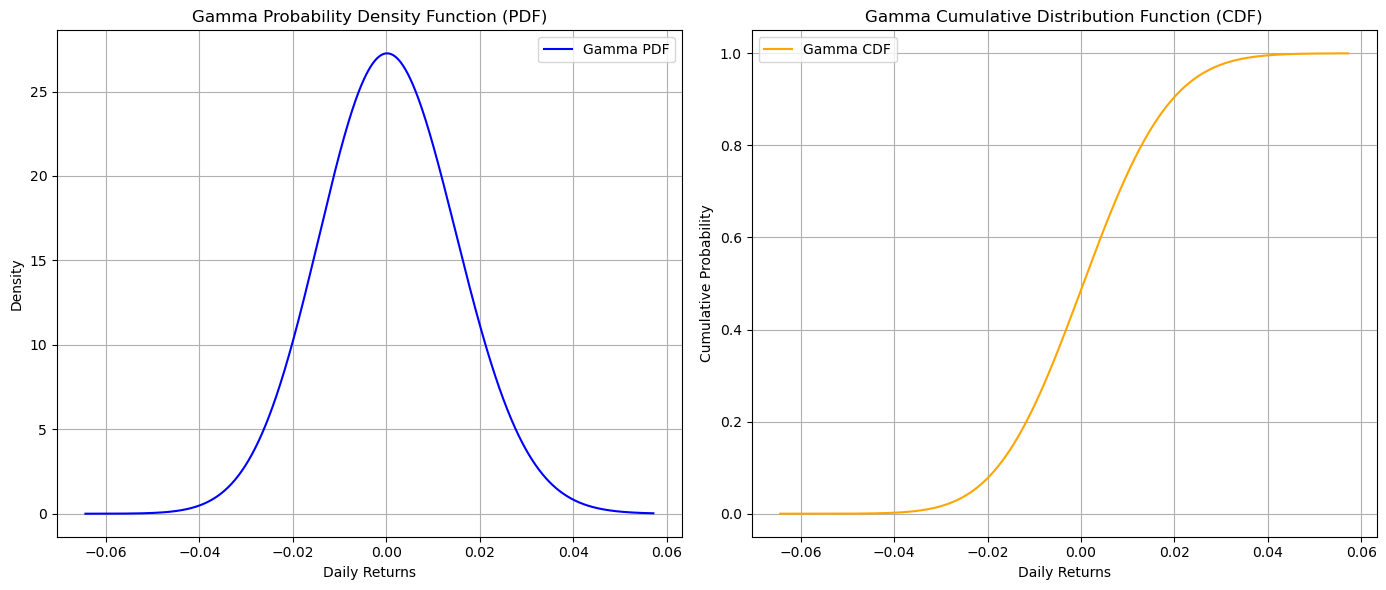


Summary Statistics for Daily Returns:
count    333.000000
mean       0.000736
std        0.014608
min       -0.064385
25%       -0.007719
50%        0.000670
75%        0.008767
max        0.057177
Name: Daily_Returns, dtype: float64

Fitted Gamma Distribution Parameters:
Shape: 841.5429369401913, Location: -0.42402480647941077, Scale: 0.0005046826894558308

Probability of a return exceeding 4.00%: 0.0036


In [151]:
import seaborn as sns
from scipy import stats

# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort the dataset by date in ascending order
stock_data.sort_values(by='Date', ascending=True, inplace=True)

# Calculate daily returns as percentage change
if 'Close' in stock_data.columns:
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Drop NaN values in 'Daily_Returns'
stock_data.dropna(subset=['Daily_Returns'], inplace=True)

# Fit a Gamma distribution to the daily returns
shape, loc, scale = stats.gamma.fit(stock_data['Daily_Returns'])

# Create a range of values for plotting the PDF and CDF
x = np.linspace(stock_data['Daily_Returns'].min(), stock_data['Daily_Returns'].max(), 1000)

# Calculate PDF and CDF using the fitted parameters
pdf = stats.gamma.pdf(x, shape, loc, scale)
cdf = stats.gamma.cdf(x, shape, loc, scale)

# Plotting the PDF and CDF
plt.figure(figsize=(14, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='Gamma PDF', color='blue')
plt.title('Gamma Probability Density Function (PDF)')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='Gamma CDF', color='orange')
plt.title('Gamma Cumulative Distribution Function (CDF)')
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Summary statistics
summary_statistics = stock_data['Daily_Returns'].describe()
print("\nSummary Statistics for Daily Returns:")
print(summary_statistics)

# Display fitted parameters of the Gamma distribution
print("\nFitted Gamma Distribution Parameters:")
print(f"Shape: {shape}, Location: {loc}, Scale: {scale}")

# Calculate the probability of a return exceeding a certain threshold (e.g., 4%)
threshold = 0.04
probability_exceeding_threshold = 1 - stats.norm.cdf(threshold, mean_return, std_dev_return)
print(f"\nProbability of a return exceeding {threshold*100:.2f}%: {probability_exceeding_threshold:.4f}")


----------------------

Continuous probabilities are more sophisticated to the analysis of stock returns, especially Gamma, as they ascertain parameters to determine the shape, location, and scale of the return distribution to see if the returns are predictable to a certain interval, which includes Probability Density Function (PDF) and Cumulative Distribution Function (CDF) (Pokharel, Aryal, Khanal, & Tsokos, 2024).

Smaller and simpler intervals of returns in percentage are depicted in the Gamma PDF to project the probability as measured in density. The shape parameter of 841 is a high value which models the skewness of the distribution to be almost exact as the normal distribution. It supports the fact that the returns are greatly aggregated around the central value, which is the mean, and that there are less variations for risks; hence, the returns are very predictable and stable.

However, the location of -0.42 suggests the distribution is centered to the left; that means the average returns are skewed to result as negative, which shows a declining trend over periods of the market. Also, the scale parameter that measures the dispersion of the curve if there are any clustering with the mean value. In this case, the scale is incredibly small, demonstrating a strong clustering around the mean leading to low risks as well as low returns.

Meanwhile, Gamma CDF mainly builds up the likelihoods as it progresses from smaller to larger returns, which entails a S-shaped curve distinguishing the return probabilities determined by a specified level. If we observe the lower side of returns, negative 4% is set to be the starting point of the rising curve while positive 4% is where the curve ends its probability, meaning it is hardly possible for the returns to exceed those values; the result will be just moving to 0.

It correlates with the Gamma PDF where -/+ 4% is the interval responsible for the probabilities of the returns, which also correlates with the Sharpe Ratio of 4% as the average excess return per day for every risk unit is introduced to trading action. Nevertheless, the CDF does not guarantee for absolute probability of 1 as it exceeds the threshold of positive 4; it means the probability to get to that far is cumulative, which requires the mean’s to add up to barely achieve, reflecting how low the volatility is. It is, though, flexible for analysts to examine the probabilities of risks of less than, equal, and more than a specified value in this illustration.


## Derivative Analysis

### 1. Options

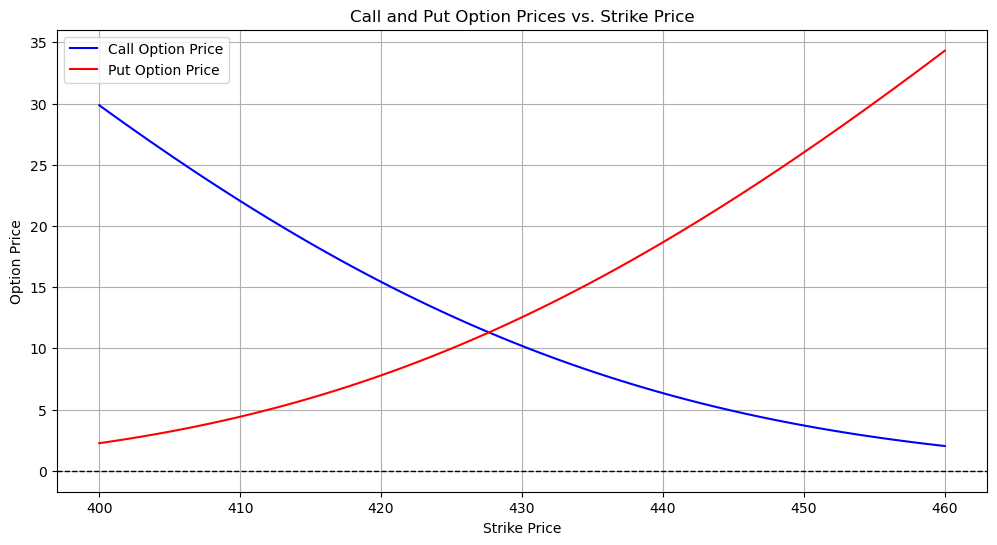

Call Option Price at Strike 430: 10.20
Put Option Price at Strike 430: 12.54


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the stock price data from the CSV file
stock_data = pd.read_csv('GS.csv')

# Assume current stock price (S), strike price (X), risk-free rate (r), and time to expiration (T)
current_price = stock_data['Adj Close'].iloc[-1]  # Last available adjusted close price
risk_free_rate = 0.02  # 2% annual risk-free rate
T = 30 / 365  # Time to expiration in years (30 days)

# Calculate daily returns
stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

# Calculate volatility (annualized)
annualized_volatility = stock_data['Returns'].std() * np.sqrt(252)

# Black-Scholes formula
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Define a range of strike prices
strike_prices = np.linspace(400, 460, 100)

# Calculate call and put option prices for each strike price
call_prices = [black_scholes(current_price, K, T, risk_free_rate, annualized_volatility, option_type='call') for K in strike_prices]
put_prices = [black_scholes(current_price, K, T, risk_free_rate, annualized_volatility, option_type='put') for K in strike_prices]

# Plotting the option prices
plt.figure(figsize=(12, 6))
plt.plot(strike_prices, call_prices, label='Call Option Price', color='blue')
plt.plot(strike_prices, put_prices, label='Put Option Price', color='red')
plt.axhline(y=0, color='black', linestyle='--', lw=1)  # Horizontal line at 0 for reference
plt.title('Call and Put Option Prices vs. Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the calculated option prices for a specific strike price
strike_price = 430  # Example strike price for detailed output
call_price = black_scholes(current_price, strike_price, T, risk_free_rate, annualized_volatility, option_type='call')
put_price = black_scholes(current_price, strike_price, T, risk_free_rate, annualized_volatility, option_type='put')

print(f'Call Option Price at Strike {strike_price}: {call_price:.2f}')
print(f'Put Option Price at Strike {strike_price}: {put_price:.2f}')


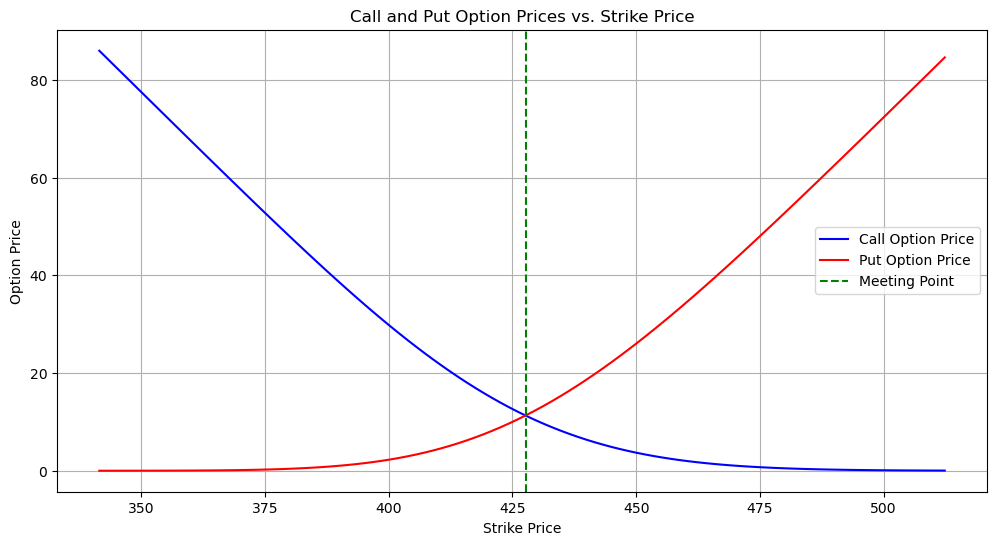

Strike Price where Call and Put Option Prices are closest: 427.81
Call Option Price: 11.22
Put Option Price: 11.38


In [55]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the stock price data from the CSV file
stock_data = pd.read_csv('GS.csv')

# Assume some required parameters
current_price = stock_data['Adj Close'].iloc[-1]  # Last available adjusted close price
risk_free_rate = 0.02  # Annual risk-free rate (example: 2%)
T = 30 / 365  # Time to expiration in years (e.g., 30 days)

# Calculate daily returns to estimate volatility
stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()
annualized_volatility = stock_data['Returns'].std() * np.sqrt(252)  # Annualized volatility

# Black-Scholes formula for option pricing
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Generate a range of strike prices
strike_prices = np.linspace(0.8 * current_price, 1.2 * current_price, 100)

# Calculate call and put prices for each strike price
call_prices = [black_scholes(current_price, K, T, risk_free_rate, annualized_volatility, 'call') for K in strike_prices]
put_prices = [black_scholes(current_price, K, T, risk_free_rate, annualized_volatility, 'put') for K in strike_prices]

# Find the point where call and put prices are closest to each other
differences = np.abs(np.array(call_prices) - np.array(put_prices))
min_index = np.argmin(differences)
strike_price_meeting_point = strike_prices[min_index]

# Plot the option prices
plt.figure(figsize=(12, 6))
plt.plot(strike_prices, call_prices, label='Call Option Price', color='blue')
plt.plot(strike_prices, put_prices, label='Put Option Price', color='red')
plt.axvline(x=strike_price_meeting_point, color='green', linestyle='--', label='Meeting Point')
plt.title('Call and Put Option Prices vs. Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

# Output the strike price where call and put prices are closest
print(f'Strike Price where Call and Put Option Prices are closest: {strike_price_meeting_point:.2f}')
print(f'Call Option Price: {call_prices[min_index]:.2f}')
print(f'Put Option Price: {put_prices[min_index]:.2f}')


To study the impact of volatility in depth, we have to associate the analysis of financial instruments to depict the association of price sensitivity with the stock market price to measure risk exposure. The first graph uses Black-Scholes method to project the price movement of call and put option prices as the strike price changes. For this, the strike price is USD 430 per share, which is the highest of all in the last ten days of the dataset as we sorted earlier, the call price is at USD 10.2 while the put price is at USD 12.50.

Thus, as the strike price becomes greater, it reduces the call price as there are little and little deviations between the strike price and the market price when people know the stock price is going to go up and want to exercise their rights to buy at a cheaper price as the strike price. This works different from the put price, it exponentially ascends as the strike price grows: people are asking for a better price (strike price) to sell when they sense the market is going down in which they have to pay as a motivation factor regarding the put price to the buyer who are willing to accept the offer whom can get it less expensive in the market actually.

Beyond the USD 430 strike price, call options are becoming more appealing to investors on the buying side who would like to secure their cost margin in a bullish market in which they are certain they can make extra profit from paying less with the call price then selling it back to the market instead of buying at the current rising-continuous price with minimal certainty. The holder of the call options also do not confront much risk to seek buyers when the strike price is not that different from the real one.

In contrast, those who hold put options at certain strike prices have to spend more in put prices to the willing buyers to mature their put option contracts and ensure they at least make money from the trade when they stock price is not performing well. Nevertheless, there is an elasticity between the call and put option prices at approximately USD 11 with the strike price of USD 427 where there should be equal amount of buyer and seller of options to execute derivatives with no risk.


Delta: 0.4803
Gamma: 0.0141
Vega: 0.4877
Theta: -0.1988
Rho: 0.1602
95% VaR: -0.0231


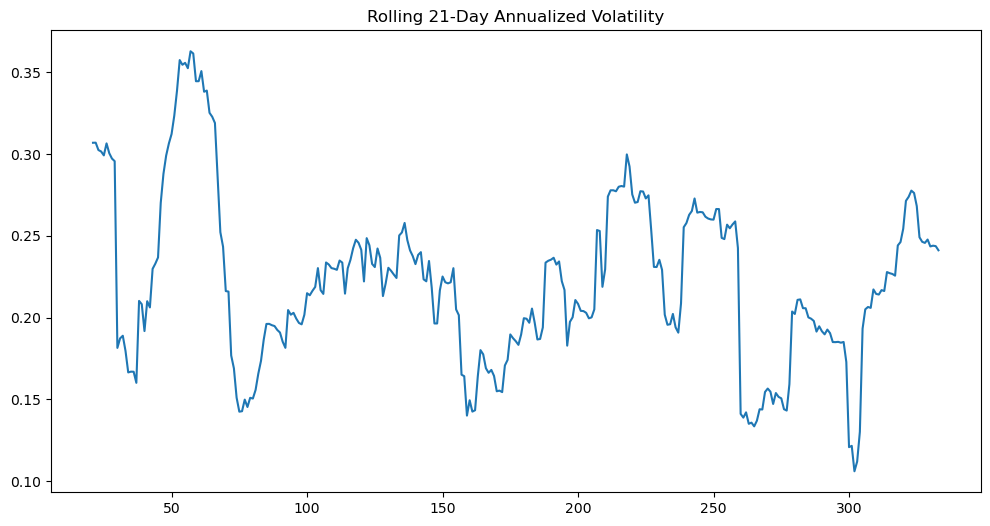

In [10]:
# Calculate daily returns
stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

# Calculate annualized volatility (assume 252 trading days per year)
annualized_volatility = stock_data['Returns'].std() * np.sqrt(252)

# Black-Scholes Formula Components
def black_scholes_greeks(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'callTo study the impact of volatility in depth, we have to associate the analysis of financial instruments to depict the association of price sensitivity with the stock market price to measure risk exposure. The first graph uses Black-Scholes method to project the price movement of call and put option prices as the strike price changes. For this, the strike price is USD 430 per share, which is the highest of all in the last ten days of the dataset as we sorted earlier, the call price is at USD 10.2 while the put price is at USD 12.50.

Thus, as the strike price becomes greater, it reduces the call price as there are little and little deviations between the strike price and the market price when people know the stock price is going to go up and want to exercise their rights to buy at a cheaper price as the strike price. This works different from the put price, it exponentially ascends as the strike price grows: people are asking for a better price (strike price) to sell when they sense the market is going down in which they have to pay as a motivation factor regarding the put price to the buyer who are willing to accept the offer whom can get it less expensive in the market actually.

Beyond the USD 430 strike price, call options are becoming more appealing to investors on the buying side who would like to secure their cost margin in a bullish market in which they are certain they can make extra profit from paying less with the call price then selling it back to the market instead of buying at the current rising-continuous price with minimal certainty. The holder of the call options also do not confront much risk to seek buyers when the strike price is not that different from the real one.

In contrast, those who hold put options at certain strike prices have to spend more in put prices to the willing buyers to mature their put option contracts and ensure they at least make money from the trade when they stock price is not performing well. Nevertheless, there is an elasticity between the call and put option prices at approximately USD 11 with the strike price of USD 427 where there should be equal amount of buyer and seller of options to execute derivatives with no risk.

        delta = norm.cdf(d1)
    else:
        delta = -norm.cdf(-d1)
    
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)) / 365
    rho = K * T * np.exp(-r * T) * norm.cdf(d2) / 100

    return delta, gamma, vega, theta, rho

# Example parameters
S = stock_data['Adj Close'].iloc[-1]  # Current stock price
K = 430  # Example strike price
r = 0.02  # Risk-free interest rate
T = 30 / 365  # Time to expiration in years
sigma = annualized_volatility

# Calculate Greeks for a call option
delta, gamma, vega, theta, rho = black_scholes_greeks(S, K, T, r, sigma, option_type='call')

# Print the calculated Greeks
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")
print(f"Rho: {rho:.4f}")

# Calculate VaR at 95% confidence level
var_95 = norm.ppf(0.05, loc=stock_data['Returns'].mean(), scale=stock_data['Returns'].std())
print(f"95% VaR: {var_95:.4f}")

# Optional: Plot the historical volatility over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
stock_data['Rolling_Volatility'] = stock_data['Returns'].rolling(window=21).std() * np.sqrt(252)
stock_data['Rolling_Volatility'].plot(title='Rolling 21-Day Annualized Volatility')
plt.show()

By that association, we have to know in which degree the option prices are sensitive and correlated with the stock price. We have to comprehend 6 indicators to affirm the risk of option prices from the fluctuation of the market price, including the Delta, Gamma, Vega, Theta, Rho, and VaR since they are helpful in strategizing risk in the form hedging. The plot is the volatility of option instruments in a year demonstrated in monthly contract expiration periods containing 21 of trading days with 3.6% as the heaviest compulsion and 2.3% of return loss in a single day, which matches the previous method.

The Delta represents the effects of the option price for every 1 USD movement of stock price. For Goldman Sach’s scenario, it can convey that the call and put option prices will change USD 0.48 whenever the stock price moves 1 USD, giving about 50% margin for option holders to profit from their rights. The Gamma is 1.4% implying a safe sensitivity reaction of option prices to price changes with limited volatility for the options; it has to take the share price to alter by USD 50 to obtain a higher probability the option price can adjust toward USD 0.48.

This leads to the account of the volatility affecting the option price by the Vega measurement. The code produced 0.487 as a result; that is USD 0.49 for option price shift for every 1% variation of volatility. 1% of volatility can be precedented in the course of 30 days or more, as predicted by the GARCH and TGARCH model; therefore, option holders can have enough time to balance their accounts.

Because options are matured monthly in standards, and volatility can be present within that range, it is a must for brokers to incorporate the value progression of their options each day, which can be explained by the Theta value. When the Theta is negative at 0.198, traders can apprehend that the value of their options is deteriorating around USD 0.20 everyday before the standard maturity. This is where the Rho figure can revoke the depreciating value as a result of the Theta since the option price is also influenced by the interest rate. 0.16 of Rho translates into USD 0.16 increase of option price for every 1% of interest rate increase.


### 2. Futures and Swaps

In [89]:
# Assume future contract details
spot_price = current_price
interest_rate = 0.02  # 2% interest rate
time_to_maturity = 30 / 365  # 30 days until maturity

# Cost of Carry model for futures pricing
def futures_price(spot, r, T):
    return spot * np.exp(r * T)

# Calculate futures price
futures_price_value = futures_price(spot_price, interest_rate, time_to_maturity)
print(f'Futures Price: {futures_price_value:.2f}')

Futures Price: 427.65


In [91]:
# Assume the following for the swap
notional_amount = 1000000  # Notional amount for the swap
fixed_rate = 0.03  # 3% fixed interest rate
floating_rate = 0.025  # Current floating rate (e.g., LIBOR)
swap_duration = 5  # Duration of the swap in years

# Calculate the present value of fixed payments
def present_value_fixed(fixed_rate, notional, duration):
    return sum([fixed_rate * notional * np.exp(-0.02 * t) for t in range(1, duration + 1)])

# Calculate the present value of floating payments (using current floating rate)
def present_value_floating(floating_rate, notional, duration):
    return sum([floating_rate * notional * np.exp(-0.02 * t) for t in range(1, duration + 1)])

# Calculate swap value
fixed_pv = present_value_fixed(fixed_rate, notional_amount, swap_duration)
floating_pv = present_value_floating(floating_rate, notional_amount, swap_duration)
swap_value = fixed_pv - floating_pv

print(f'Swap Value: {swap_value:.2f}')


Swap Value: 23553.53


Interest Rate Sensitivity: -48543.69
Credit Spread Estimate: 0.2314
Liquidity Cost Estimate: 5000.00
Mark-to-Market Valuation: -854253.14


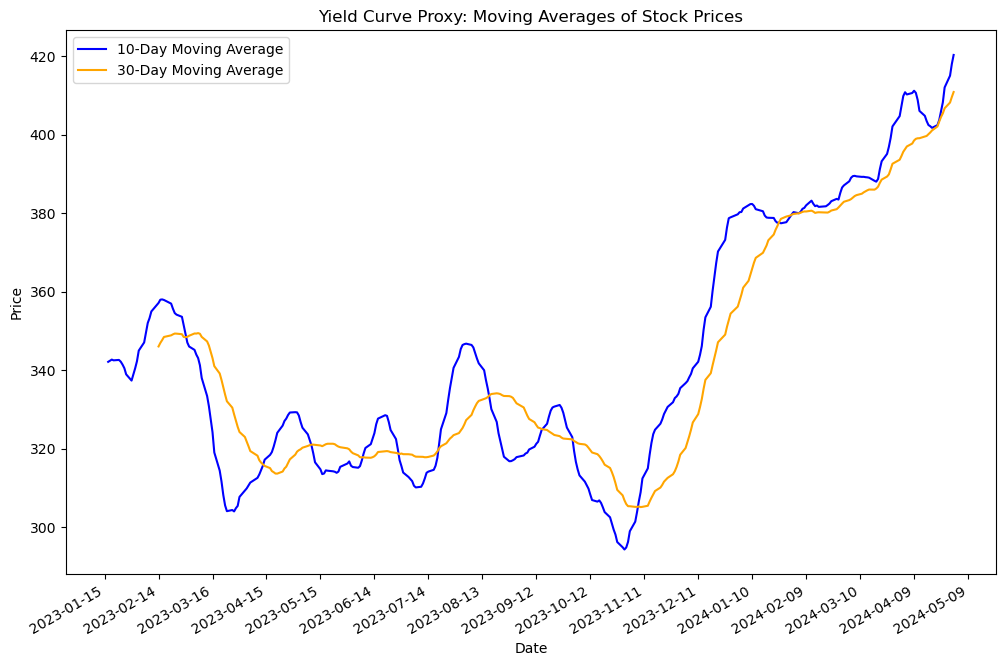

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import norm
import statsmodels.api as sm

# Load the stock price data from the CSV file
stock_data = pd.read_csv('GS.csv')

# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Example assumptions for swap analysis
notional_amount = 1_000_000  # Notional value of the swap
fixed_rate = 0.03  # 3% fixed rate
floating_rate_index = stock_data['Adj Close']  # Using 'Adj Close' as a proxy for floating rates

# Calculate daily returns to simulate floating rate changes
stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

# Interest Rate Risk: Duration Analysis
duration_years = 5
modified_duration = duration_years / (1 + fixed_rate)

# Sensitivity to interest rate changes
interest_rate_change = 0.01  # Simulate a 1% change
sensitivity = -modified_duration * interest_rate_change * notional_amount
print(f"Interest Rate Sensitivity: {sensitivity:.2f}")

# Credit Risk: Simple Credit Spread Analysis using daily returns volatility
credit_spread = stock_data['Returns'].std() * np.sqrt(252)  # Annualized volatility as a proxy for credit spread
print(f"Credit Spread Estimate: {credit_spread:.4f}")

# Liquidity Risk: Analyzing bid-ask spread
bid_ask_spread = 0.005  # Assume 0.5% for simplicity
liquidity_cost = notional_amount * bid_ask_spread
print(f"Liquidity Cost Estimate: {liquidity_cost:.2f}")

# Valuation Risk: Mark-to-Market Valuation using floating rate movements
fixed_leg_value = notional_amount * fixed_rate * duration_years
floating_leg_value = notional_amount * (1 + stock_data['Returns'].mean() * duration_years)
mark_to_market_value = fixed_leg_value - floating_leg_value
print(f"Mark-to-Market Valuation: {mark_to_market_value:.2f}")

# Yield Curve Analysis (Simplified example using moving averages)
stock_data['10-Day MA'] = stock_data['Adj Close'].rolling(window=10).mean()
stock_data['30-Day MA'] = stock_data['Adj Close'].rolling(window=30).mean()

# Plot yield curve proxy with 30-day date intervals
plt.figure(figsize=(12, 8))
plt.plot(stock_data['Date'], stock_data['10-Day MA'], label='10-Day Moving Average', color='blue')
plt.plot(stock_data['Date'], stock_data['30-Day MA'], label='30-Day Moving Average', color='orange')

# Format the date axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate and align the date labels

plt.title('Yield Curve Proxy: Moving Averages of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The moving averages (MAs) of the stock price project the yield curve proxy executive for the anticipation of interest rate trends, which can then be utilized to assess the risk of futures and swaps. There seems to be an upward trend of the yield curve, entailing a rising pattern of interest rates. Dramatic gaps in interest effects can be viewed through the averaging comparison of 10 and 30 days; hence, swaps and futures become more profound in their risk management for both short- and long-term investment strategies.

First, understanding sensitivity to interest rate changes is beneficial for future and swap derivatives, especially those with floating legs determined by LIBOR and SOFR. With a result of –48 hundred, the floating interest rate is designed to flourish under normal economic conditions of low interest rates. For example, if a 1% interest rate increase occurs, the swap value would suffer a loss of more than USD 48,000 while its value stands at USD 23,000, which presents a major concern. Indicatively, such a swap was only profitable and should have matured no later than November 11, 2023. Futures exhibit similar characteristics.

Second, recognizing the swap risk attributed to interest rate changes helps prepare to handle credit considerations in managing swap positions and cash flows during critical times; this is conveyed by the estimate of the credit spread. Measuring at 0.23, this signals a credit risk where swaps may encounter low cash flow due to counterparty creditworthiness issues for more frequent and larger swap volumes. This also applies to the margin maintenance of futures. A widening credit spread, as the trend rises, signifies increased interest rates and losses in swap and future values.

Third, the Liquidity Cost of USD 5,000 necessitates a manageable entry and exit strategy for futures and swap positions. For futures, this can vary by units per contract with USD 427.65 as the value per unit. If the contract contains 100 units, the position is USD 42,765, making the liquidity cost about 11% of the trade. For a rising trend in averages, the spread becomes more uniform, attracting more futures buyers, reducing liquidity risk, and potentially lowering costs to below USD 5,000 for favorable positions since the trend is not driven by volatility, as shown by the TGARCH model's results for the last 30 days. However, interest rate sensitivity can drive the cost higher. Similarly, for swaps, liquidity cost deteriorates to over 20% of the swap value (USD 23,553.53) when portfolio managers exit or rebalance their positions based on interest rate movements, making swaps costlier to maintain and exit as trends rise.

Fourth, a negative mark-to-market (MTM) value of USD 850K indicates significant deterioration in the derivative position compared to its initial valuation. This suggests unfavorable market movements since the position was initiated. For interest rate swaps, MTM losses may result from yield curve changes or worsening credit conditions. Additionally, this implies potential collateral requirements if the swap agreement includes a collateralization clause. In futures, MTM losses can lead to margin calls, requiring additional funds to maintain the position. A substantial negative MTM value could result in a liquidity crunch, especially for highly leveraged positions.
ns.


## Implication & Recommendation

### Risk Management

One of the first steps in risk management is risk identification so that you can strategize and prioritize your financial benefits in the market. The initial tactic is to assess the Annualized Volatility rate (23%) as investors expect the health of their returns to be finalized in a yearly manner to infer their long-term objectives of investments. The question is, will that be a gain or loss? Despite its positive trend in the long run, portfolio managers have to keep in mind that their daily variance is quite intense for active trading, leading us to have an average return of 0.07% daily. The intensity and unpredictability can be viewed with the testing of ACF and PACF, where only the direct effect by PACF of the first trading day can predict the behavior of the next two trading days, showing inverse impacts. If the first day they win, the next two days result in losses and vice versa. This is a sign for action to profit from the first day of gain by selling the trades for maximum cashout possible and investing in other well-performing stocks before the fall in the next two days or selling before the second day arrives for minimal loss. The average loss per day is 2.3%, and if volatility is more intense, then we can lose more than three percent.

Since daily returns are difficult to project, we can understand their behavior through probability approaches. We know that the average return is 0.07% per day and that it exists within the range of -0.2% to 1.6%, where any value from that range can happen five times a day. The best of all is that 0.3% return has the highest probability of 17.5% of occurring in the portfolio investment that day. It becomes clearer that the daily returns are more compact and assured by Gamma indications. Based on the past data analyzed by the TGARCH model, there were around 50 days in quarter 3 where gains ranged from 3% to 6% as their highest. Thus, the Gammas also state that it is possible for trades to exploit events of over 4%, but with a tight probability of 0.36% in a day. Numerically, this translates to 3.6% in 10 days and 36% in 100 days, resulting in 18% in 50 days as configured. With these insights, we can conduct scenario analysis to determine which return percentage within the range occurring five times per day will be at market close, giving a prior activity alert to buy or sell at the most anticipated profit with 0.3% return at 17.5% occurrence in those five times per day.

**Tail Risk:** It is already known that a significant and potential fall of investment value in a single day is -3.3%, and there is a 25% chance of days where returns drop lower than the -0.7% threshold, given the PMF distribution. This is substantial compared to the daily mean return of 0.07%. A stop-loss method is recommended for 25% of the trades.

**Event Risk:** As five trades per day can lose or gain between -0.2% and 1.6%, the call and put strike prices can change drastically in a given day. Hence, intraday monitoring of price movement, trade results, and contract timeframes is necessary. It also means buyers are willing to pay more for long-term maturity against volatile daily price fluctuations, and sellers can ask for favorable premiums to compensate. For every USD 1 stock price move, option prices adjust by USD 0.48.

**Credit Risk:** Investors must pay 0.23% plus the risk-free rate of 2%, equaling 2.23%, whenever the contract matures. Note that swaps contradict rising interest rates; this approach rewards premium charges on the seller's side to reduce risk if interest rates exceed 1%. Portfolio analysts and managers should classify their counterparties for creditworthiness to ensure flexibility and transparency in swap pricing strategies to guarantee cash flow as much as possible instead of swap defaults.

**Liquidity Risk:** The swap entry is USD 28,553, and the exit value is USD 18,553. Since the moving average is demand-driven instead of volatility-driven, buyers should enter as soon as possible before interest starts to soar as MAs grow without further cost. For sellers, it is the right time to realize their gains of up to USD 18,000. Additionally, investors must incur a rate of 2.23%, which applies to futures and margin calls at the price of USD 427 with great volume.
lume.


### Derivative Pricing and Hedging

Effective derivative pricing and hedging are crucial for asset managers and investors aiming to control market volatility while optimizing possible returns. A number of important measures, including Delta, Gamma, Vega, Theta, Rho, and strike price analysis, influence the pricing of financial derivatives, including options, swaps, and futures. Each of these metrics provides distinct perspectives on how derivatives behave under various market conditions. By understanding and utilizing these measures, investors can create sophisticated hedging strategies that reduce risks and improve portfolio performance.

One of the most basic metrics for pricing derivatives is **Delta**, which quantifies how sensitive an option is to a USD1 change in the price of the underlying asset. A Delta of 0.48 for Goldman Sachs' options indicates that for every USD1 change in the stock price, the option price will shift by USD0.48. This implies that when significant price swings in the underlying asset are anticipated, options with a high Delta can be employed as efficient hedging tools. Asset managers can effectively lock in profits from favorable price swings by increasing their exposure to price changes through the use of high-Delta options. However, a large Delta also raises the risk, so it's crucial to monitor how the stock price moves. Delta can magnify gains; for instance, if an investor owns call options with a Delta of 0.48 and the stock price increases by USD5, the option's value will climb by USD2.40.

The examination of price sensitivity is further refined by Gamma, which calculates the rate at which Delta varies when the underlying price changes. With a Gamma of 1.4% for Goldman Sachs options, the Delta's sensitivity to changes in the stock price stays constant unless there is a large movement in the price. When creating options-based hedging strategies, asset managers should take this into consideration. Combining Delta and Gamma will enable investors to adjust their holdings in response to changes in the option's sensitivity as the market moves. The Gamma will raise the option's Delta if the stock price rises noticeably, giving it even greater exposure to price fluctuations. Gamma is a crucial statistic in volatile markets where significant price swings are anticipated because of this dynamic adjustment. For example, a USD50 change in the stock price could have a big impact on the option price and allow an investor to profit more.

Derivative pricing relies heavily on Vega, which gauges how sensitive an option's price is to fluctuations in volatility, particularly in situations where volatility is a major concern. A Vega of 0.487 for Goldman Sachs' options indicates that for every 1% change in volatility, the option price will fluctuate by USD0.49. Option pricing can be greatly impacted by volatility, and being able to anticipate and control volatility becomes crucial during periods of increased market uncertainty. Option prices usually climb in response to increased volatility and vice versa. When anticipating greater market volatility, asset managers should keep a careful eye on volatility and use derivatives with a higher Vega. For instance, buying options with a larger Vega helps protect the portfolio against the unfavorable effects of macroeconomic events that are predicted to increase volatility. To guarantee thorough risk management, volatility-based hedging strategies should be combined with additional measures like Delta and Theta.

When thinking about the time horizon of an investment, Theta—which represents the option's time decay—is crucial. Goldman Sachs' options have a negative Theta of -0.198, meaning that as they get closer to expiration, their value drops by USD0.20 each day. For asset managers who are in charge of options that are about to expire, time decay can seriously reduce the value of long options positions. In order to lessen the impact of Theta, investors wishing to hedge long-term positions can think about utilizing spreads or shorter-duration options. By purchasing a long option and selling a short option with a closer expiration date, for instance, a spread enables the investor to profit from price changes without being as susceptible to time decay. Combining Theta with other metrics, such as Vega, to protect against volatility can also lessen its influence.

In derivative pricing, Rho is crucial for controlling interest rate risk since it gauges how sensitive an option's price is to shifts in interest rates. For Goldman Sachs' options, a Rho of 0.16 indicates that for every 1% increase in interest rates, the option price will rise by USD0.16. Because of this, Rho is especially important for interest rate-sensitive derivatives like futures and swaps. Options and swaps with greater Rho values gain value in an environment where interest rates are rising, and asset managers can use them as a hedge against the negative consequences of rising interest rates. To profit from the price increase, an investor might, for instance, use futures with a greater Rho if they anticipate a 1% increase in interest rates. Similar to this, asset managers who work with fixed-income securities or debt-related derivatives, where changes in interest rates have a big influence, must handle Rho well.

Derivative pricing is also significantly influenced by the strike price of options. For example, the relationship between the strike price and the market price of the underlying asset determines the potential profitability of call and put options on Goldman Sachs stock with a strike price of USD430. The price of the call option usually falls as the strike price rises because the option's intrinsic value diminishes and becomes less appealing. On the other hand, the put option price rises in tandem with the strike price, indicating the increasing probability of exercising the option in a declining market. Asset managers can modify the exposure of their portfolio to rising or declining markets by using this knowledge of strike price dynamics. For instance, an asset manager may select a lower strike price for their call options if they anticipate a rise in the stock price to optimize profit potential.

The combination of Delta, Gamma, Vega, Theta, Rho, and strike price research can be used by investors and asset managers to make well-informed decisions on hedging and derivative pricing. Investors can create more flexible hedging strategies that adjust to shifting market situations by comprehending these metrics. An investor who anticipates significant volatility, for instance, might buy options with a high Vega and modify their positions in response to the Delta and Gamma values. In the meanwhile, investors who are worried about time decay could employ methods like spreads or shorter-duration options that lessen the impact of Theta. Asset managers can more effectively manage risk, navigate market swings, and improve portfolio performance for optimal return by incorporating these insights into their derivative pricing strategies.

-----------------------

## Reference

Afzal, F., Haiying, P., Afzal, F., Mahmood, A., & Ikram, A. (2021). Value-at-Risk Analysis for Measuring Stochastic Volatility of Stock Returns: Using GARCH-Based Dynamic Conditional Correlation Model. SAGE Open. https://doi.org/10.1177/21582440211005758

Guo, Z. (2023). Research on the Augmented Dickey-Fuller Test for Predicting Stock Prices and Returns. Advances in Economics, Management and Political Sciences, 44, 101-106. (EwaDirect)ps://www.ewadirect.com/proceedings/aemps/article/view/6246)

Jayasekare, R. R., Gill, R., & Lee, K. (2016). Modeling discrete stock price changes using a mixture of Poisson distributions. Journal of the Korean Statistical Society, 45(3), 409–421. https://doi.org/10.1016/j.jkss.2016.01.002 

Kelliher, C. (2022). Quantitative finance with python: A practical guide to investment management, trading, and financial engineering. CRC Press. 

Kapturov, A. (2025). Goldman Sachs & JPMorgan Chase share prices. Kaggle. https://www.kaggle.com/datasets/kapturovalexander/goldman-sachs-and-jpmorgan-chase-share-prices 


Lioudis, N. (2024, January 30). Understanding the sharpe ratio. Investopedia. https://www.investopedia.com/articles/07/sharpe_ratio.asp
Pokharel, J. K., Aryal, G., Khanal, N., & Tsokos, C. P. (2024). Probability Distributions for Modeling Stock Market Returns—An Empirical Inquiry. International Journal of Financial Studies, 12(2), 43. https://doi.org/10.3390/ijfs12020043


McClay, R. (2023, July 24). Goldman Sachs vs. Morgan Stanley: Comparing business models. Investopedia. https://www.investopedia.com/insights/goldman-sachs-vs-morgan-stanley-comparing-business-models/


----